In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("D:/2022_ML/Datasets\Zomatodataset\zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
# Basic EDA
"""
1. Finding missing values
2. Exploring Numerical Value columns
3. Exploring Categorical Value columns
4. Finding Relationship b/w the features

"""


'\n1. Finding missing values\n2. Exploring Numerical Value columns\n3. Exploring Categorical Value columns\n4. Finding Relationship b/w the features\n\n'

In [6]:
print(df.isnull().sum())
print("-------printing not null columns-------------")

[col for col in df.columns if df[col].isnull().sum()>0]

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
-------printing not null columns-------------


['Cuisines']

In [7]:
country_df = pd.read_excel("D:/2022_ML\Datasets\Zomatodataset\Country-Code.xlsx")
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [9]:
# checks for merging
'Restaurant ID', 'Restaurant Name', 'Country Code', 'City'
dummy_df=pd.DataFrame()
dummy_df["Restaurant ID"]=[12,3,4,5,15,12,45,21,445,22]
dummy_df["Restaurant Name"]=['a','b','c','d','g','u1','ee','t1','op','tr']
dummy_df["Country Code"]=[1,2160,30,37,94,1,112,7189,88,90]
dummy_df.head()

,Restaurant ID,Restaurant Name,Country Code
0,12,a,1
1,3,b,2160
2,4,c,30
3,5,d,37
4,15,g,94


In [10]:
country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [11]:
print("dummy_df shape: ",dummy_df.shape)
print("country_df shape: ",country_df.shape)
print("--following country codes are not in Country_df --")
for val in dummy_df['Country Code']:
    if val not in country_df['Country Code']:
        print(val)

dummy_df shape:  (10, 3)
country_df shape:  (15, 2)
--following country codes are not in Country_df --
2160
30
37
94
112
7189
88
90


In [12]:
# POC: merging dummy_df and country_df on the Country code columns
pd.merge(dummy_df,country_df,on='Country Code',how='left')

,Restaurant ID,Restaurant Name,Country Code,Country
0,12,a,1,India
1,3,b,2160,NaN
2,4,c,30,Brazil
3,5,d,37,Canada
4,15,g,94,Indonesia
5,12,u1,1,India
6,45,ee,112,NaN
7,21,t1,7189,NaN
8,445,op,88,NaN
9,22,tr,90,NaN


In [13]:
# Merging df and country_df to include the Country column in final df
final_df = pd.merge(df,country_df,on='Country Code',how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [15]:
# Number of records country_wise
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: Country, dtype: int64

One thing that can be implied from above value_counts(): India has maximum no of records, this is clear coz the main base of operation for Zomato is in India

In [18]:
country_name=final_df.Country.value_counts().index
country_values=final_df.Country.value_counts().values
print(country_name)
print(country_values)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Sri Lanka', 'Qatar', 'Singapore', 'Canada'],
      dtype='object')
[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x1d492216088>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Sri Lanka'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Singapore'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')],
 [Text(-0.5739579075

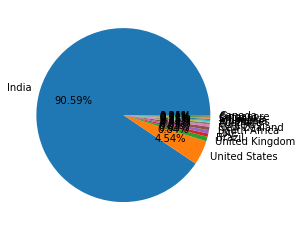

In [22]:
# pie chart depicting above data
plt.pie(country_values,labels=country_name,autopct='%1.2f%%')

In [23]:
final_df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [24]:
final_df["Rating color"].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [25]:
final_df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [27]:
# group by
final_df.groupby(['Aggregate rating']).size()

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
dtype: int64

In [29]:
final_df.groupby(["Rating color"]).size()

Rating color
Dark Green     301
Green         1079
Orange        3737
Red            186
White         2148
Yellow        2100
dtype: int64

In [30]:
final_df.groupby(["Rating text"]).size()

Rating text
Average      3737
Excellent     301
Good         2100
Not rated    2148
Poor          186
Very Good    1079
dtype: int64

In [31]:
# grouping them together
final_df.groupby(["Aggregate rating","Rating color","Rating text"]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

eg:
2.5               Orange        Average         110

The above records means that there are 110 entries for records of [2.5,Orange,Average,110]
Observation:

- There are 110 entries of Average rating of 2.5 and these are color coded as Orange

In [34]:
# Save the above results in Dataframe
ratings_df = final_df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Num_records"})
ratings_df


,Aggregate rating,Rating color,Rating text,Num_records
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


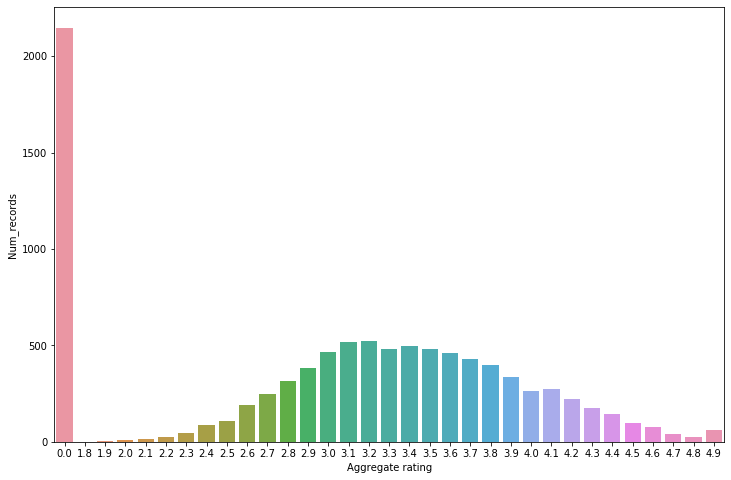

In [37]:
#plotting above data based on Aggregate Rating
import matplotlib
matplotlib.rcParams['figure.figsize']=[12,8]
sns.barplot(x="Aggregate rating",y="Num_records",data=ratings_df)

EDA insights Qs:
1. Which countries have online deliveries option? How does that correlate to the Aggregate rating?
2. Which countries have Table Booking option? How does that correlate to the Aggregate rating?
3. What currencies most countries deals in ?
4. For countries having online deliveries, which cities opts most for online deliveries? Do the same for Table Bookings
5. Most Loved Cuisines all over the world?
6. Most ordered online cuisines country wise
7. Country wise, order quantity vs Order Price visualisation
8. Price range of most ordered food  (a) country wise and (b) world wide
9. Average cost for two of most ordered food  (a) country wise and (b) world wide

ADVANCE EDA insights Qs:
1. Clustering to identify where most restaurants are located in the world.

In [38]:
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [39]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [71]:
# 1. %age of online deliveries [world wide] 
print("-----------------World wide -----------------------")
print("Countries listed in dataset:\n",final_df['Country'].unique())
print("\nTotal records in dataset:\n",final_df.shape)
print("Total records having online deliveries") # first filter the values from df--> then groupby them
print(final_df[final_df['Has Online delivery']=='Yes'].shape)

print("%age of records having online orders:",round(100*(final_df[final_df['Has Online delivery']=='Yes'].shape[0]/final_df.shape[0]),2))

-----------------World wide -----------------------
Countries listed in dataset:
 ['Phillipines' 'Brazil' 'United States' 'Australia' 'Canada' 'Singapore'
 'UAE' 'India' 'Indonesia' 'New Zealand' 'United Kingdom' 'Qatar'
 'South Africa' 'Sri Lanka' 'Turkey']

Total records in dataset:
 (9551, 22)
Total records having online deliveries
(2451, 22)
%age of records having online orders: 25.66


In [73]:
# %age of online deliveries country wise
""" first filter, then groupby"""

final_df[final_df['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

Observation:
- Out of 2451 online deliveries all over the world, there are only two countries which makes up the total
 - India with 2423 out of 2451 online deliveries is the top country, followed by UAE with marginal 28 online orders


PART 1: India specific EDA:

1.a: Online Deliveries:-

In [81]:
ol_india_df=final_df[(final_df['Has Online delivery']=='Yes') & (final_df['Country']=="India")]
ol_india_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
646,18396250,Huber & Holly,1,Ahmedabad,"7 B, Circle B, Opposite Rajpath Club, Sarkhej...",Bodakdev,"Bodakdev, Ahmedabad",72.512395,23.038311,"Ice Cream, Desserts, Continental",...,No,Yes,No,No,1,4.5,Dark Green,Excellent,217,India
648,113433,Fozzie's Pizzaiolo,1,Ahmedabad,"Ground Floor, Maruti Crystal, Opposite Rajpath...",Bodakdev,"Bodakdev, Ahmedabad",72.509806,23.033069,"Pizza, Italian, Beverages, Desserts",...,No,Yes,No,No,3,4.3,Green,Very Good,731,India
649,18438909,La Pino'z Pizza,1,Ahmedabad,"Shop 10, Circle B, Nyay Marg, Bodakdev, Ahmed...",Bodakdev,"Bodakdev, Ahmedabad",72.512487,23.038231,"Pizza, Italian",...,No,Yes,No,No,2,4.4,Green,Very Good,113,India


In [87]:
ol_india_df.groupby(["Aggregate rating"]).size().reset_index().rename(columns={0:"num_records"})

,Aggregate rating,num_records
0,0.0,96
1,1.8,1
2,1.9,1
3,2.0,5
4,2.1,11
5,2.2,20
6,2.3,33
7,2.4,45
8,2.5,68
9,2.6,104
